# Fourier Transform Experiments

[This](https://www.youtube.com/watch?v=Y9FZ4igNxNA) video has finally kicked me over the edge. I want to learn about Fourier Transforms. Specifically, how to use them. They're awesome.

In [1]:
import pandas as pd
import numpy as np
from scipy import fftpack
import matplotlib.ticker as plticker

## Build the time domain

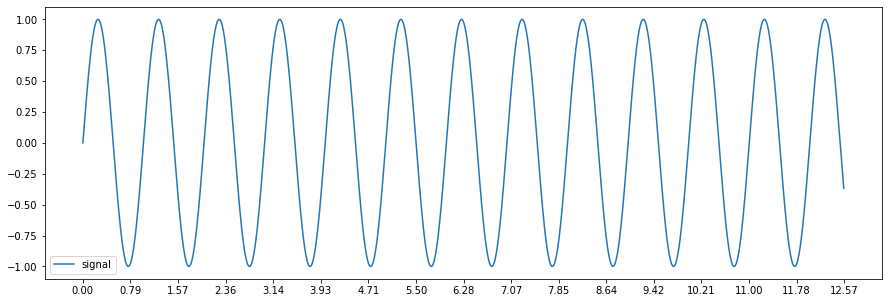

In [5]:
# The function that defines the time domain values.
f = lambda x: np.sin(2 * np.pi * x)

# Amount of time over which we should observe the signal function.
obs_time = 4 * np.pi
# Frequency with which we should observe the signal function
obs_freq = 1 / 100

# Define the x axis of the time domain.
x = np.arange(0, obs_time, obs_freq)

# Calculate the signal.
y = (f(curr_x) for curr_x in x)

# Construct a dataframe.
df = (
    pd.DataFrame(
        index=x,
        data=y
    )
    .rename({0: "signal"}, axis=1)
)
ax = df.plot(figsize=(15, 5))
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=np.pi / 4))

## Build the frequency domain

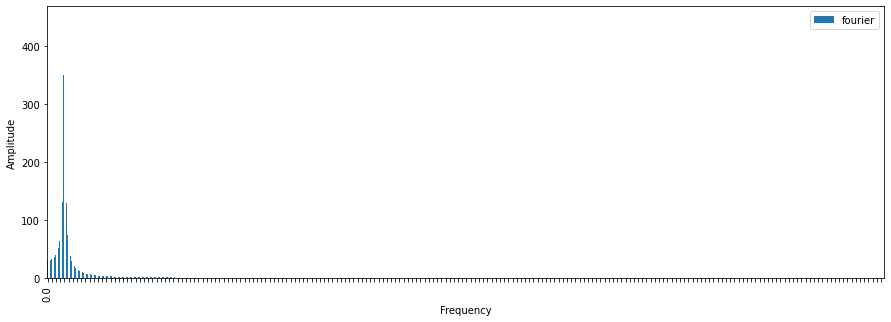

In [6]:
# Calculate the frequency domain.
freq_domain = np.fft.fft(df["signal"].values)
x = fftpack.fftfreq(freq_domain.size, obs_freq)

fft_df = (
    pd.DataFrame(
        index=x[:x.size // 2],
        data=freq_domain[:freq_domain.size // 2]
    )
    .abs()
    .rename({0: "fourier"}, axis=1)
)
ax = fft_df.plot.bar(figsize=(15, 5), xlabel="Frequency", ylabel="Amplitude")
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=np.pi / 2))
# ax.set_xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi])
# ax.set_xticklabels(["0", "π/2", "π", "3π/2", "2π"])